## Metadata EDA

In [1]:
%%time
import pandas as pd

# load metadata extracted data in previous notebook
arxiv_metadata = pd.read_csv('data/arxiv_metadata.zip')

<timed exec>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 9.6 s, sys: 1.67 s, total: 11.3 s
Wall time: 10.3 s


### Submitted vs. published papers

In [22]:
idx = arxiv_metadata['journal-ref'].isna()
arxiv_published = arxiv_metadata[~idx]
pd.DataFrame.from_dict({'Submitted': arxiv_metadata.shape[0], 'Published': arxiv_published.shape[0]}, orient='index', columns=["Total papers"])

,Total papers
Submitted,2412624
Published,831878


### Papers by subject

In [23]:
keys = ["Computer Science", "Economics", "Electrical Engineering and Systems Science", "Mathematics", "Physics", "Quantitative Biology", "Quantitative Finance", "Statistics", "Junk"]

# total papers submitted, by subject
counts_total = {key:arxiv_metadata[key].sum() for key in keys if key in arxiv_metadata.keys()}
counts_total_df = pd.DataFrame.from_dict(counts_total, orient='index', columns=["Count"])
counts_total_df['Subject'] = counts_total_df.index

# papers published, by subject
counts_published = {key:arxiv_published[key].sum() for key in keys if key in arxiv_published.keys()}
counts_published_df = pd.DataFrame.from_dict(counts_published, orient='index', columns=["Count"])
counts_published_df['Subject'] = counts_published_df.index

# merge both into 1 dataframe
counts_df = counts_total_df.join(counts_published_df, on="Subject", how='left', lsuffix='_left', rsuffix='_right')
counts_df = counts_df.drop(['Subject', 'Subject_left', 'Subject_right'], axis=1)
counts_df.rename(columns={'Count_left':'Submitted', 'Count_right':'Published'}, inplace=True)
counts_df

,Submitted,Published
Computer Science,815903,167662
Economics,9100,1033
Electrical Engineering and Systems Science,78751,8768
Mathematics,623796,144144
Physics,1222329,617797
Quantitative Biology,44284,13023
Quantitative Finance,18398,3755
Statistics,115092,17182
Junk,3850,660


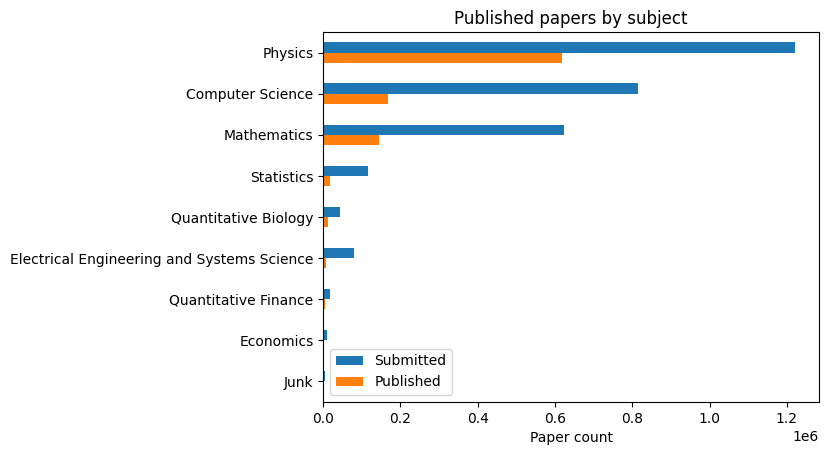

In [40]:
pp_subject = counts_df.sort_values('Published', ascending=False)
bar_plot = pp_subject.plot.barh()
bar_plot.set_title('Papers by subject')
bar_plot.set_xlabel('Paper count')
bar_plot.invert_yaxis()
plt.show();

_Note that cummulated column totals my be different than total number of papers, as a paper may be in several categories._

### Published papers over time

In [24]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np

%matplotlib inline

#### Cumulative number of published papers 

In [25]:
# Index by Created date. Sets a Pandas DatetimeIndex on the DataFrame
#arxiv_df_published.set_index('Created', inplace=True)
# Group by year and month, aggregate using size

# keep only papers 1992 - 2023, as older years are incomplete
min_year = 1992  # arxiv_metadata.year.min()
max_year = 2023  # arxiv_metadata.year.max()

arxiv_published = arxiv_published[(arxiv_published['year'] >= min_year)]
arxiv_published = arxiv_published[(arxiv_published['year'] <= max_year)]

row_counts = arxiv_published.groupby([arxiv_published.year, arxiv_published.month]).size()
row_counts.index.set_names(['year', 'month'], inplace=True)

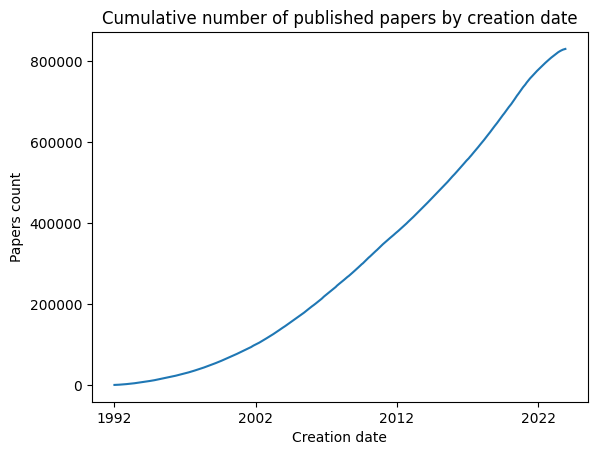

In [35]:
plt.title('Cumulative number of published papers by creation date')
plt.xticks(ticks=range(0, len(row_counts), 120), labels=range(min_year, max_year+1, 10))
plt.xlabel('Creation date')
plt.ylabel('Papers count')
plt.plot(np.cumsum(list(row_counts)), color='tab:blue')
plt.show();

#### Monthly number of published papers

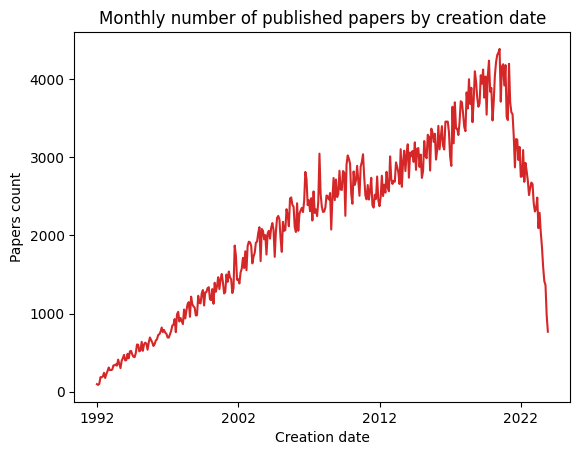

In [34]:
plt.title('Monthly number of published papers by creation date')
plt.xticks(ticks=range(0, len(row_counts), 120), labels=range(min_year, max_year+1, 10))
plt.xlabel('Creation date')
plt.ylabel('Papers count')
plt.plot(list(row_counts), color='tab:red')
plt.show();

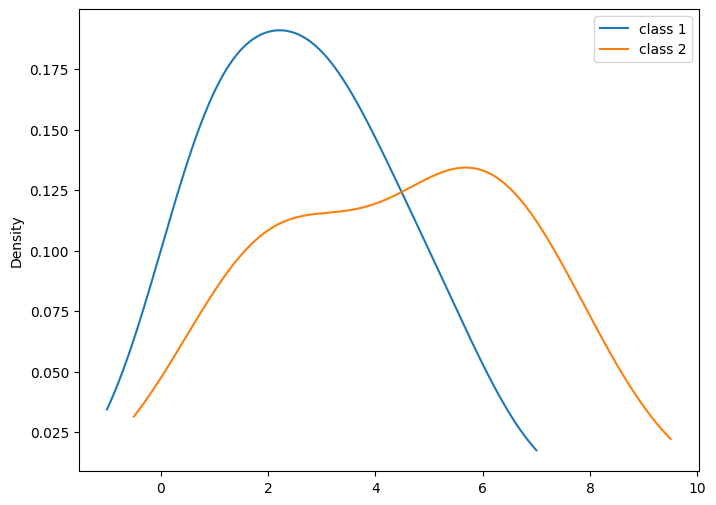

In [65]:
classes = ["class 1"] * 5 + ["class 2"] * 5
vals = [1,3,5,1,3] + [2,6,7,5,2]
p_df = pd.DataFrame({"class": classes, "vals": vals})

fig, ax = plt.subplots(figsize=(8,6))
for label, df in p_df.groupby('class'):
    df.vals.plot(kind="kde", ax=ax, label=label)
plt.legend()

In [66]:
p_df

,class,vals
0,class 1,1
1,class 1,3
2,class 1,5
3,class 1,1
4,class 1,3
5,class 2,2
6,class 2,6
7,class 2,7
8,class 2,5
9,class 2,2


In [67]:
counts_gg

,Published,subject
Computer Science,167662,Computer Science
Economics,1033,Economics
Electrical Engineering and Systems Science,8768,Electrical Engineering and Systems Science
Mathematics,144144,Mathematics
Physics,617797,Physics
Quantitative Biology,13023,Quantitative Biology
Quantitative Finance,3755,Quantitative Finance
Statistics,17182,Statistics
Junk,660,Junk
